<font size=6, font color=blue>**PA005: Customer Clustering**

# Solution Planning

## Input

- Business Problem
    * Select most valuable customers to create a loyalty program called Insiders


- Data
    * One year of e-commerce sales

## Output

* A list of customers that will be part of Insiders
* A report answering business questions
    1. Who are the eligible customers to participate in the Insiders program? 
    2. How many customers will be part of the program?
    3. What are the main characteristics of these customers? 
    4. What revenue percentage comes from Insiders?
    5. What is the Insiders' expected revenue for the coming months?
    6. What are the conditions for a customer to be eligible for the Insiders program? 
    7. What are the conditions for a customer to be removed from the Insiders program?
    8. What is the guarantee that the Insiders program is better than the regular customer database? 
    9. What actions can the marketing team make to increase the revenue?

## Tasks

* A report answering business questions:
    1. Who are the eligible customers to participate in the Insiders program?
        - Understand the criteria to a eligible customer. 
        - Criteria examples:
            * Revenue
                * High average ticket
                * High LTV (lifetime value)
                * Low recency
                * High basket size
                * Low churn probability
            * Expenses
                * Return rate
            * Buying Experience
                * High average notes on reviews<br><br>
                
    2. How many customers will be part of the program?
        - Calculate the percentage of customers that belong to Insiders program over the total number of customers.<br><br>
                
    3. What are the main characteristics of these customers? 
        - Indicate customer characteristics:
            * Age
            * City
            * Education level
            * Localization, etc.
        - Indicate consumption characteristics:
            * Clusters attributes<br><br>
                
    4. What revenue percentage comes from Insiders?
        - Calculate the percentage of Insiders revenue over the total revenue.<br><br>
                
    5. What is the Insiders' expected revenue for the coming months?
        - Calculate Insiders' LTV
        - Calculate Cohort Analysis.<br><br>
        
    6. What are the conditions for a customer to be eligible for the Insiders program? 
        - Define verification periodicity (monthly, quarterly, etc.) 
        - The customer must be similar to a customer on Insiders.<br><br>
                
    7. What are the conditions for a customer to be removed from the Insiders program?
        - Define verification periodicity (monthly, quarterly, etc.) 
        - The customer must be dissimilar to a customer on Insiders.<br><br>
            
    8. What is the guarantee that the Insiders program is better than the regular customer database? 
        - Perform A/B Test
        - Perform A/B Bayesian Test  
        - Perform Hypothesis Test <br><br>
                        
    9. What actions can the marketing team make to increase the revenue?
        - Discount
        - Buying preferences
        - Shipping options
        - Promote a visit to the company, etc.

* Solution Benchmark
    - Desk Research <br>
        <font color=red>* INSERIR EXEMPLOS APLICADOS NO MERCADO </font><br>
        * 

# Imports

In [4]:
import numpy   as np
import pandas  as pd
import seaborn as sns

from IPython.core.display  import HTML
from matplotlib            import pyplot           as plt
from sklearn               import cluster          as c
from yellowbrick.cluster   import KElbowVisualizer 

## Helper Functions

In [5]:
def personal_settings():
    # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

        
    # seaborn settings
    sns.set(rc={'figure.figsize':(20,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)

In [6]:
personal_settings()

## Load Dataset

In [7]:
df_raw = pd.read_csv(r'../data/raw/ecommerce.csv')

In [8]:
df_raw.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8  
0   29-Nov-16       2.55    17850.00  United Kingdom         NaN  
1   29-Nov-16       3.39    17850.00  United Kingdom         NaN  
2   29-Nov-16       2.75    17850.00  United Kingdom         NaN  
3   29-Nov-16       3.39    17850.00  United Kingdom         NaN  
4   29-Nov-16       3.39    17850.00  United Kingdom         NaN

In [9]:
# drop 'unnamed: 8' column
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis =1)

# Data Description

In [10]:
df2 = df_raw.copy()

## Rename Columns

In [11]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
cols_new = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']
df2.columns = cols_new
df2.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  invoice_date  unit_price  customer_id         country  
0    29-Nov-16        2.55     17850.00  United Kingdom  
1    29-Nov-16        3.39     17850.00  United Kingdom  
2    29-Nov-16        2.75     17850.00  United Kingdom  
3    29-Nov-16        3.39     17850.00  United Kingdom  
4    29-Nov-16        3.39     17850.00  United Kingdom

## Data Dimensions

In [13]:
print('Number of rows: {}'.format(df2.shape[0]))
print('Number of cols: {}'.format(df2.shape[1]))

Number of rows: 541909
Number of cols: 8


## Data Types

In [14]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [15]:
df2.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  invoice_date  unit_price  customer_id         country  
0    29-Nov-16        2.55     17850.00  United Kingdom  
1    29-Nov-16        3.39     17850.00  United Kingdom  
2    29-Nov-16        2.75     17850.00  United Kingdom  
3    29-Nov-16        3.39     17850.00  United Kingdom  
4    29-Nov-16        3.39     17850.00  United Kingdom

## Check NA

In [16]:
df2.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [17]:
# c01 - removing NA
df2 = df2.dropna(subset=['description','customer_id'])
print ('Removed data: {:.2f}'.format(1 - df2.shape[0]/df_raw.shape[0]))

Removed data: 0.25


In [18]:
df2.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change dtypes

In [19]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [20]:
df2.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  invoice_date  unit_price  customer_id         country  
0    29-Nov-16        2.55     17850.00  United Kingdom  
1    29-Nov-16        3.39     17850.00  United Kingdom  
2    29-Nov-16        2.75     17850.00  United Kingdom  
3    29-Nov-16        3.39     17850.00  United Kingdom  
4    29-Nov-16        3.39     17850.00  United Kingdom

In [21]:
# changing 'invoice_date'
df2['invoice_date'] = pd.to_datetime (df2['invoice_date'], format='%d-%b-%y')
df2.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  invoice_date  unit_price  customer_id         country  
0   2016-11-29        2.55     17850.00  United Kingdom  
1   2016-11-29        3.39     17850.00  United Kingdom  
2   2016-11-29        2.75     17850.00  United Kingdom  
3   2016-11-29        3.39     17850.00  United Kingdom  
4   2016-11-29        3.39     17850.00  United Kingdom

In [22]:
# changing 'customer_id'
df2['customer_id'] = df2['customer_id'].astype(int)

In [23]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## Descriptive Statistics

# Feature Engineering

In [24]:
df3 = df2.copy()

## Feature Creation

In [25]:
# data reference
df_ref = df3.drop(['invoice_no','stock_code','description','quantity','invoice_date','unit_price','country'],
                  axis=1).drop_duplicates(ignore_index=True)
print('Data reference shape:', df_ref.shape)
df_ref.head()

Data reference shape: (4372, 1)


customer_id
0        17850
1        13047
2        12583
3        13748
4        15100

In [26]:
# === MONETARY 

# creating 'gross_revenue' (= quantity * price)
df3['gross_revenue'] = df3['quantity']*df3['unit_price']

# creating 'monetary'
df_monetary = df3[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()

# merging dataframes
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

Checking NA: 

 customer_id      0
gross_revenue    0
dtype: int64 


Data reference shape: (4372, 2)


customer_id  gross_revenue
0        17850        5288.63
1        13047        3079.10
2        12583        7187.34
3        13748         948.25
4        15100         635.10

In [27]:
# === RECENCY (last day of purchase)
df_recency = df3[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df3['invoice_date'].max() - df_recency['invoice_date']).dt.days # dt vectorize the series to apply 'days' command
df_recency = df_recency[['customer_id','recency_days']].copy()

# merging dataframes
df_ref = pd.merge(df_ref, df_recency, on='customer_id',how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

Checking NA: 

 customer_id      0
gross_revenue    0
recency_days     0
dtype: int64 


Data reference shape: (4372, 3)


customer_id  gross_revenue  recency_days
0        17850        5288.63           302
1        13047        3079.10            31
2        12583        7187.34             2
3        13748         948.25            95
4        15100         635.10           330

In [28]:
# === FREQUENCY (number of purchases)
df_freq = df3[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_freq = df_freq.rename(columns={'customer_id': 'customer_id','invoice_no': 'invoice_freq'}) # changing columns names

# merging dataframes
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

Checking NA: 

 customer_id      0
gross_revenue    0
recency_days     0
invoice_freq     0
dtype: int64 


Data reference shape: (4372, 4)


customer_id  gross_revenue  recency_days  invoice_freq
0        17850        5288.63           302            35
1        13047        3079.10            31            18
2        12583        7187.34             2            18
3        13748         948.25            95             5
4        15100         635.10           330             6

In [29]:
df_ref.head()

customer_id  gross_revenue  recency_days  invoice_freq
0        17850        5288.63           302            35
1        13047        3079.10            31            18
2        12583        7187.34             2            18
3        13748         948.25            95             5
4        15100         635.10           330             6

# Variable Filtering

In [30]:
df4 = df_ref.copy()

# EDA (Exploratory Data Analysis)

In [31]:
df5 = df4.copy()

# Data Preparation

In [32]:
df6 = df5.copy()

# Feature Selection

In [33]:
df7 = df6.copy()

# Hypermarameter Fine-Tunning

In [34]:
X = df7.drop(columns=['customer_id'])
X.head()

gross_revenue  recency_days  invoice_freq
0        5288.63           302            35
1        3079.10            31            18
2        7187.34             2            18
3         948.25            95             5
4         635.10           330             6

In [35]:
clusters = [2,3,4,5,6]

## Within-Cluster Sum of Square (WSS)

[100161464120.90105, 52830442008.00694, 39986557693.70823, 22956270440.126106, 19974463394.768684]


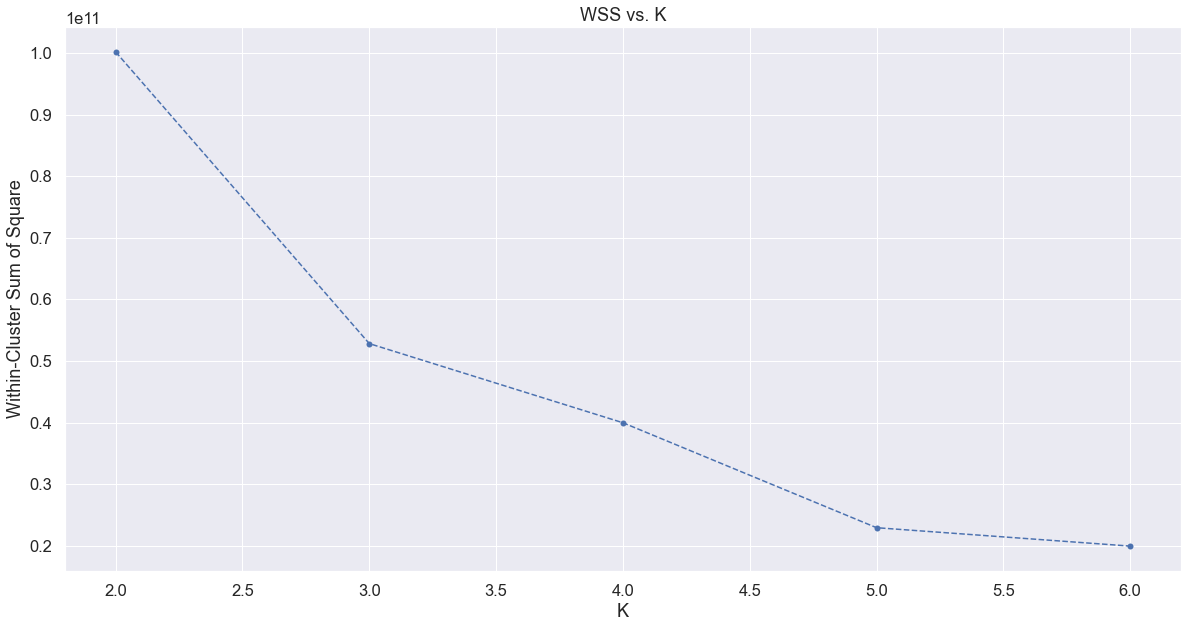

In [36]:
wss = []

for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', 
                      n_clusters=k, 
                      n_init=10, # init random inicia o centroide aleatoriamente, n_init 
                      max_iter=300, 
                      random_state=42) # random state define um estado aleat√≥rio fixo
    
    # model training
    kmeans.fit(X)
    
    # validation
    wss.append(kmeans.inertia_) # generates a wss value for each k
    
# wss plot - elbow method
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K') # number of clusters
plt.ylabel('Within-Cluster Sum of Square')
plt.title('WSS vs. K')

print(wss)

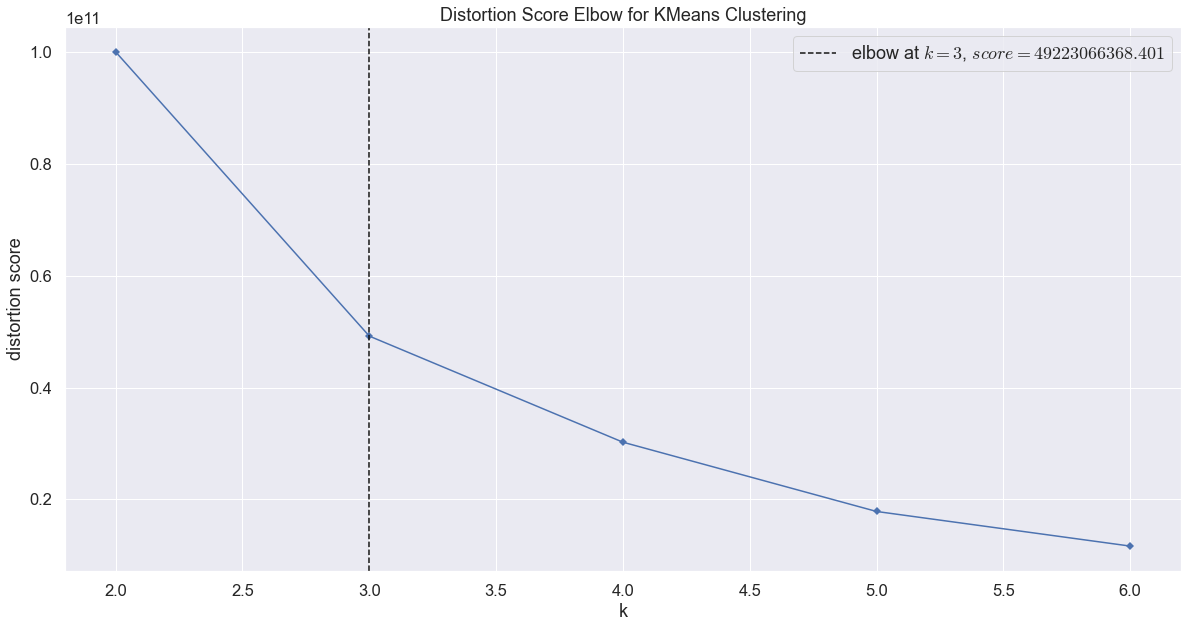

In [37]:
# yellow brick

kmeans_y = KElbowVisualizer(c.KMeans(), k=clusters, timings=False);
kmeans_y.fit(X);
kmeans_y.show();





















## Silhoute Score

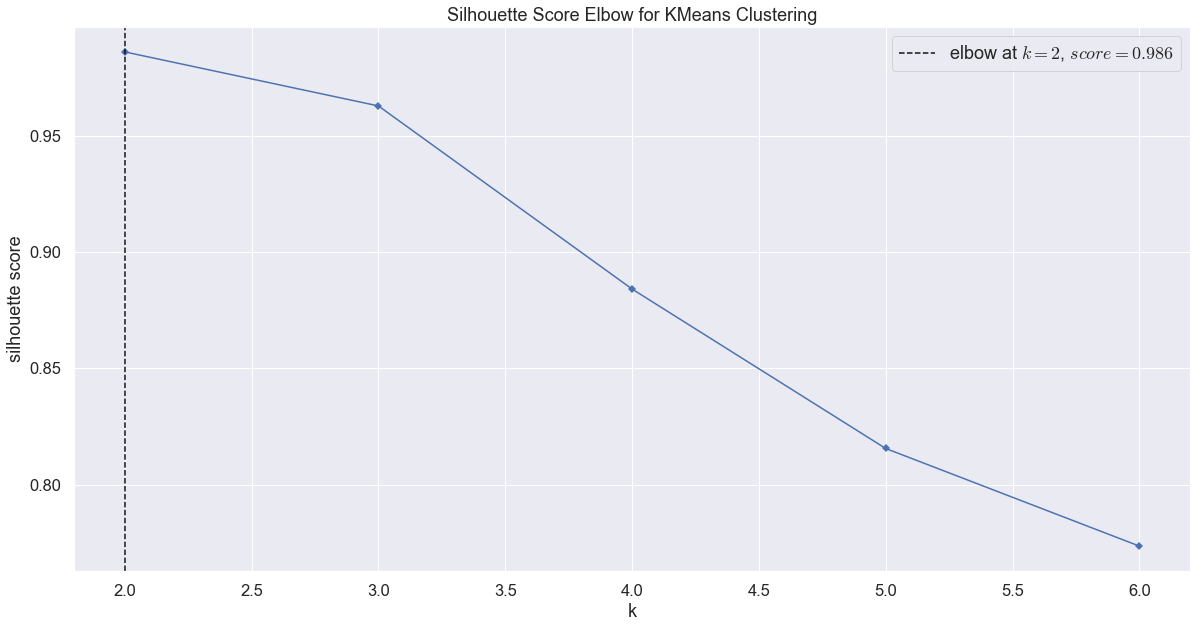

In [38]:
# yellow brick

kmeans_y = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False);
kmeans_y.fit(X);
kmeans_y.show();

# Model training

# Cluster Analysis

# Deploy to Production